In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
O = big5_sc.loc[:, "O1":"O10"]

In [5]:
O.loc[:,"score"] = big5_sc.loc[:,"O_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_13832\1650376474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O.loc[:,"score"] = big5_sc.loc[:,"O_SC"]


In [6]:
O

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,score
0,4,5,3,5,5,5,4,2,5,5,43
1,3,3,3,3,2,3,3,1,3,2,26
2,4,1,5,5,5,5,5,5,5,5,45
3,4,3,5,4,4,4,5,2,5,5,41
4,3,5,1,5,3,5,3,1,5,3,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,3,5,3,4,5,4,2,5,3,35
19715,1,4,3,4,3,3,4,2,3,3,30
19716,5,3,1,3,4,5,1,5,5,5,37
19717,3,4,5,3,4,5,5,3,5,5,42


In [13]:
categorys = []
for val in O['score']:
    if val < 25:
        category = 0
    elif val > 35 :
        category = 2
    else:
        category = 1
    categorys.append(category)
    
O['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_13832\1076605636.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O['C'] = categorys


In [14]:
O

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,score,C
0,4,5,3,5,5,5,4,2,5,5,43,2
1,3,3,3,3,2,3,3,1,3,2,26,1
2,4,1,5,5,5,5,5,5,5,5,45,2
3,4,3,5,4,4,4,5,2,5,5,41,2
4,3,5,1,5,3,5,3,1,5,3,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,3,5,3,4,5,4,2,5,3,35,1
19715,1,4,3,4,3,3,4,2,3,3,30,1
19716,5,3,1,3,4,5,1,5,5,5,37,2
19717,3,4,5,3,4,5,5,3,5,5,42,2


In [15]:
O_train_X, O_train_y = O.iloc[:int(len(O.index)*0.8), :-2], O.iloc[:int(len(O.index)*0.8), -1]
O_test_X, O_test_y = O.iloc[int(len(O.index)*0.8):, :-2], O.iloc[int(len(O.index)*0.8):, -1]
O_test_X = O_test_X.reset_index(drop=True)

In [16]:
O_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
O_classifier.fit(O_train_X, O_train_y)

O_train_score = O_classifier.score(O_train_X, O_train_y)
print(O_train_score)

O_score = O_classifier.score(O_test_X, O_test_y)
print(O_score)

0.9982250396196514
0.9482758620689655


In [17]:
O_train_y_pred = O_classifier.predict(O_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(O_train_y), (O_train_y != O_train_y_pred).sum()))
print('정확도 : %.2f' %((len(O_train_y) - (O_train_y != O_train_y_pred).sum()) / len(O_train_y)))

총 학습 개수 : 15775, 오류개수 : 28
정확도 : 1.00


In [18]:
O_y_pred = O_classifier.predict(O_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(O_test_y), (O_test_y != O_y_pred).sum()))
print('정확도 : %.2f' %((len(O_test_y) - (O_test_y != O_y_pred).sum()) / len(O_test_y)))

총 테스트 개수 : 3944, 오류개수 : 204
정확도 : 0.95


feature ranking:
1. feature O10 (0.202)
2. feature O2 (0.138)
3. feature O1 (0.122)
4. feature O3 (0.092)
5. feature O4 (0.085)
6. feature O6 (0.080)
7. feature O8 (0.078)
8. feature O5 (0.076)
9. feature O7 (0.064)
10. feature O9 (0.062)


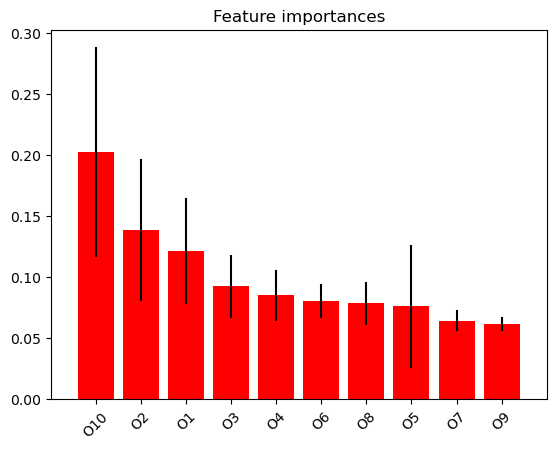

In [19]:
importances = O_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in O_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(O_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, O_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(O_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(O_train_X.columns)), O_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(O_train_X.columns)])
plt.show()

In [20]:
random.seed(0)
shuffled_scores = {}

for feature in O_train_X.columns:
    copy = O_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = O_classifier.score(copy, O_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'O1': 0.9289381933438986, 'O2': 0.933755942947702, 'O3': 0.946877971473851, 'O4': 0.9475752773375594, 'O5': 0.9632963549920761, 'O6': 0.9472583201267829, 'O7': 0.9572107765451664, 'O8': 0.9504912836767037, 'O9': 0.9615847860538828, 'O10': 0.9295087163232963}


In [21]:
print("Original Classfication Accuracy : %.4f"%O_train_score)
for n in range(len(O_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[O_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9982
1 high importance shuffled Accuracy : 0.9295
2 high importance shuffled Accuracy : 0.9338
3 high importance shuffled Accuracy : 0.9289
4 high importance shuffled Accuracy : 0.9469
5 high importance shuffled Accuracy : 0.9476
6 high importance shuffled Accuracy : 0.9473
7 high importance shuffled Accuracy : 0.9505
8 high importance shuffled Accuracy : 0.9633
9 high importance shuffled Accuracy : 0.9572
10 high importance shuffled Accuracy : 0.9616


In [22]:
random.seed(0)
shuffled_scores = {}

for feature in O_test_X.columns:
    copy = O_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = O_classifier.score(copy, O_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'O1': 0.9079614604462475, 'O2': 0.9196247464503042, 'O3': 0.9244421906693712, 'O4': 0.9170892494929006, 'O5': 0.9302738336713996, 'O6': 0.9155679513184585, 'O7': 0.9287525354969574, 'O8': 0.9196247464503042, 'O9': 0.9249492900608519, 'O10': 0.9039046653144016}


In [23]:
print("Original Classfication Accuracy : %.4f"%O_score)
for n in range(len(O_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[O_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9483
1 high importance shuffled Accuracy : 0.9039
2 high importance shuffled Accuracy : 0.9196
3 high importance shuffled Accuracy : 0.9080
4 high importance shuffled Accuracy : 0.9244
5 high importance shuffled Accuracy : 0.9171
6 high importance shuffled Accuracy : 0.9156
7 high importance shuffled Accuracy : 0.9196
8 high importance shuffled Accuracy : 0.9303
9 high importance shuffled Accuracy : 0.9288
10 high importance shuffled Accuracy : 0.9249


In [24]:
O2_se_train_X = O_train_X.copy()
O2_se_train_X = O2_se_train_X.loc[:, ["O10", "O2"]]

O2_se_test_X = O_test_X.copy()
O2_se_test_X = O2_se_test_X.loc[:, ["O10", "O2"]]
O2_se_test_X = O2_se_test_X.reset_index(drop=True)

O2_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O2_se_classifier.fit(O2_se_train_X, O_train_y)

O2_se_score = O2_se_classifier.score(O2_se_train_X, O_train_y)
print(O2_se_score)

O2_se_test_score = O2_se_classifier.score(O2_se_test_X, O_test_y)
print(O2_se_test_score)

0.8414580031695721
0.8493914807302231


In [25]:
O3_se_train_X = O_train_X.copy()
O3_se_train_X = O3_se_train_X.loc[:, ["O10", "O1","O2"]]

O3_se_test_X = O_test_X.copy()
O3_se_test_X = O3_se_test_X.loc[:, ["O10", "O1","O2"]]
O3_se_test_X = O3_se_test_X.reset_index(drop=True)

O3_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O3_se_classifier.fit(O3_se_train_X, O_train_y)

O3_se_score = O3_se_classifier.score(O3_se_train_X, O_train_y)
print(O3_se_score)

O3_se_test_score = O3_se_classifier.score(O3_se_test_X, O_test_y)
print(O3_se_test_score)

0.8766402535657686
0.8772819472616633


In [26]:
O4_se_train_X = O_train_X.copy()
O4_se_train_X = O4_se_train_X.loc[:, ["O10", "O1","O3","O2"]]

O4_se_test_X = O_test_X.copy()
O4_se_test_X = O4_se_test_X.loc[:, ["O10", "O1","O3","O2"]]
O4_se_test_X = O4_se_test_X.reset_index(drop=True)

O4_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O4_se_classifier.fit(O4_se_train_X, O_train_y)

O4_se_score = O4_se_classifier.score(O4_se_train_X, O_train_y)
print(O4_se_score)

O4_se_test_score = O4_se_classifier.score(O4_se_test_X, O_test_y)
print(O4_se_test_score)

0.9046592709984153
0.8930020283975659


In [27]:
O5_se_train_X = O_train_X.copy()
O5_se_train_X = O5_se_train_X.loc[:, ["O10", "O1","O3","O2","O4"]]

O5_se_test_X = O_test_X.copy()
O5_se_test_X = O5_se_test_X.loc[:, ["O10", "O1","O3","O2","O4"]]
O5_se_test_X = O5_se_test_X.reset_index(drop=True)

O5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O5_se_classifier.fit(O5_se_train_X, O_train_y)

O5_se_score = O5_se_classifier.score(O5_se_train_X, O_train_y)
print(O5_se_score)

O5_se_test_score = O5_se_classifier.score(O5_se_test_X, O_test_y)
print(O5_se_test_score)

0.9278605388272583
0.9059330628803245


In [28]:
O5_se_train_X = O_train_X.copy()
O5_se_train_X = O5_se_train_X.loc[:, ["O10", "O1","O3","O2","O4", "O6"]]

O5_se_test_X = O_test_X.copy()
O5_se_test_X = O5_se_test_X.loc[:, ["O10", "O1","O3","O2","O4", "O6"]]
O5_se_test_X = O5_se_test_X.reset_index(drop=True)

O5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O5_se_classifier.fit(O5_se_train_X, O_train_y)

O5_se_score = O5_se_classifier.score(O5_se_train_X, O_train_y)
print(O5_se_score)

O5_se_test_score = O5_se_classifier.score(O5_se_test_X, O_test_y)
print(O5_se_test_score)

0.9471315372424722
0.9087221095334685


In [29]:
O5_se_train_X = O_train_X.copy()
O5_se_train_X = O5_se_train_X.loc[:, ["O10", "O1","O3","O2","O4", "O6", "O8"]]

O5_se_test_X = O_test_X.copy()
O5_se_test_X = O5_se_test_X.loc[:, ["O10", "O1","O3","O2","O4", "O6", "O8"]]
O5_se_test_X = O5_se_test_X.reset_index(drop=True)

O5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
O5_se_classifier.fit(O5_se_train_X, O_train_y)

O5_se_score = O5_se_classifier.score(O5_se_train_X, O_train_y)
print(O5_se_score)

O5_se_test_score = O5_se_classifier.score(O5_se_test_X, O_test_y)
print(O5_se_test_score)

0.9666561014263074
0.9224137931034483


4~5